In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [3]:
df = pd.read_csv('../data/preprocessed_data.csv')

In [4]:
df.head()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,3,0.570801,0.3125,0.461431,0.504418,0.035756,0.143079,0.578613,...,0,1,0,0,0,0,0,0,0,1
1,Blue,False,3,0.000000,0.7500,0.411250,0.467500,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0
2,Blue,False,3,0.000000,0.0000,0.560000,0.550000,0.280000,0.000000,1.000000,...,0,1,0,0,0,0,0,0,0,1
3,Red,False,3,0.000000,0.1250,0.220625,0.515000,0.108750,0.250000,0.062500,...,0,1,0,0,0,0,0,0,1,0
4,Red,False,3,0.500000,0.0000,0.590000,0.465000,0.000000,0.500000,0.000000,...,0,0,0,1,0,0,1,0,0,0


### Normalizing data

In [7]:
df_num = df.select_dtypes(include=[float, int])

In [8]:
scaler = StandardScaler()

df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])

### Splitting into train, test

In [9]:
y = df['Winner']
X = df.drop(columns = 'Winner')

# dont split into train/test here -> do so after dropping na value rows
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

### NaN Error fix (else it occurs when trying to fit model)

not best practive here, row with Na value can differ from later scraping times

In [10]:
y.value_counts()

Red     4525
Blue    2315
Name: Winner, dtype: int64

In [11]:
len(y)

6840

In [12]:
y.isna().value_counts()

False    6840
Name: Winner, dtype: int64

In [13]:
y.loc[y.isna()]

Series([], Name: Winner, dtype: object)

In [14]:
df.loc[[191]]

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
191,Blue,False,-0.230493,2.351941,-0.461676,0.461623,-0.434627,0.943715,-1.073444,0.985066,...,-0.036298,0.568571,-0.02419,-0.489469,-0.227289,-0.046881,0.570147,-0.017102,-0.502283,-0.20775


In [15]:
# y.drop(191, inplace=True)

In [16]:
# X.drop(191, inplace=True)

### Split into Train/Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

### Fitting baseline Random Forest

In [18]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=43)

In [20]:
model.oob_score_

0.6602031394275162

In [21]:
y_preds = model.predict(X_test)

In [22]:
accuracy_score(y_test, y_preds)

0.6666666666666666

In [23]:
feat_imps = {}
for i, imp in enumerate(model.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [24]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('R_age', 0.021021959010755605),
 ('B_age', 0.016110942678476136),
 ('R_avg_opp_HEAD_landed', 0.015040313078744929),
 ('B_Reach_cms', 0.01464437725113775),
 ('R_avg_opp_SIG_STR_pct', 0.01352520465268611),
 ('R_avg_opp_SIG_STR_landed', 0.01218920884712499),
 ('B_Height_cms', 0.011785995196670285),
 ('R_Reach_cms', 0.011602301827207933),
 ('R_Height_cms', 0.01075746123153565),
 ('R_avg_opp_DISTANCE_landed', 0.010640132173954688),
 ('R_avg_SIG_STR_pct', 0.010582835009078506),
 ('R_avg_opp_BODY_att', 0.010457872936916277),
 ('B_avg_DISTANCE_att', 0.010442923781130835),
 ('B_avg_HEAD_landed', 0.010243172339791766),
 ('B_avg_SIG_STR_landed', 0.010161638708042604),
 ('R_Weight_lbs', 0.009955927595049313),
 ('R_total_time_fought(seconds)', 0.009949184546926665),
 ('R_avg_GROUND_att', 0.009920264507914498),
 ('R_avg_opp_DISTANCE_att', 0.009909409643578445),
 ('B_avg_DISTANCE_landed', 0.009771931222506025),
 ('R_avg_opp_HEAD_att', 0.00976675005889546),
 ('R_avg_GROUND_landed', 0.009719080714733

In [25]:
y_train.value_counts()

Red     4291
Blue    2207
Name: Winner, dtype: int64

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

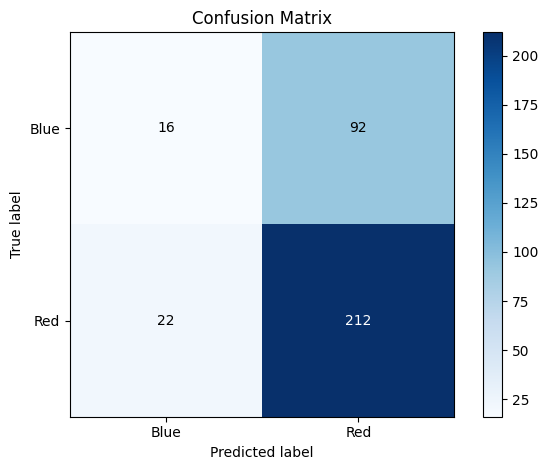

In [26]:
cm = confusion_matrix(y_test, y_preds)
classes = unique_labels(y_test, y_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

### Oversampling

In [27]:
%pip install imblearn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     -------------- ------------------------ 81.9/226.0 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 226.0/226.0 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import ADASYN, SMOTE

In [29]:
over_sampler = ADASYN()
# over_sampler = SMOTE()

# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html
# changed .fit_sample() to .fit_resample(), since .fit_sample() seems to be renamed in this version of imblearn library
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

In [30]:
pd.Series(y_resampled).value_counts()

Blue    4453
Red     4291
Name: Winner, dtype: int64

In [31]:
model2 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(oob_score=True, random_state=43)

In [32]:
model2.oob_score_

0.7705855443732845

In [33]:
y2_preds = model2.predict(X_test)

In [34]:
accuracy_score(y_test, y2_preds)

0.6461988304093568

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

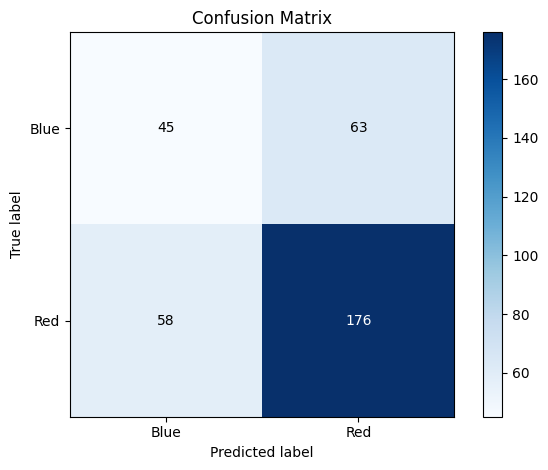

In [35]:
cm = confusion_matrix(y_test, y2_preds)
classes = unique_labels(y_test, y2_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [36]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [37]:
model3 = RandomForestClassifier(random_state=43)
rf_random = RandomizedSearchCV(estimator = model3, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=43),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [38]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [39]:
model4 = rf_random.best_estimator_

In [40]:
y3_preds = model4.predict(X_test)
accuracy_score(y_test, y3_preds)

0.6842105263157895

In [41]:
new_param_grid = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [600, 800, 1000, 1200],
'criterion' :['gini']}

In [42]:
rf = RandomForestClassifier(random_state=43)
rf_grid = GridSearchCV(estimator = rf, param_grid = new_param_grid, 
                                cv = 3, verbose=2, n_jobs = 1)
rf_grid.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  30.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  29.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  28.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  39.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  39.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  38.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  51.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  49.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  47.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  58.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  56.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  30.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  33.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  40.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  37.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  50.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  52.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  49.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  58.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  56.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  30.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  29.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  27.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  38.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  37.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  49.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  48.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  46.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  58.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  55.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  28.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  26.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  36.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  35.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  47.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  46.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  44.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  57.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  55.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  53.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  28.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  27.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  26.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  36.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  35.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  47.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  46.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  44.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  57.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  55.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  52.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  28.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  27.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  26.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  38.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  37.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  35.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  47.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  46.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  43.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  57.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  55.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  52.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  27.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  26.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  25.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  36.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  35.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  33.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  45.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  44.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  42.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  54.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  53.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  52.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  27.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  27.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  25.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  36.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  34.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  33.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  45.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  44.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  42.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  54.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  53.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  50.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  27.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  26.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  25.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  36.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  36.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  33.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  45.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  44.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  42.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  54.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  53.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  50.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  29.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  29.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  39.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  39.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  37.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  49.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  48.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  46.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  59.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  58.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  56.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  30.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  40.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  39.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  37.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  49.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  48.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  46.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  60.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  58.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  55.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  30.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  29.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  27.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  38.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  37.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  50.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  48.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  46.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  58.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  55.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  28.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  27.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  26.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  36.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  35.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  47.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  46.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  44.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  57.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  55.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  54.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  29.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  27.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  26.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  38.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  37.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  35.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  47.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  46.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  44.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  57.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  55.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  52.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  28.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  27.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  26.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  38.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  36.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  35.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  47.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  46.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  43.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  57.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  56.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  53.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  27.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  26.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  25.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  36.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  35.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  33.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  45.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  44.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  41.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  54.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  53.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  50.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  27.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  26.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  25.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  36.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  35.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  33.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  45.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  44.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  41.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  54.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  53.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  50.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  27.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  26.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  25.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  36.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  35.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  33.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  45.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  44.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  41.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  54.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  53.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  50.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  29.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  27.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  39.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  38.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  49.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  49.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  46.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  59.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  58.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  56.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  29.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  29.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  27.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  39.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  38.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  37.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  49.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  48.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  46.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  58.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  56.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  29.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  29.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  27.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  38.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  36.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  49.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  48.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  46.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  58.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  55.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  28.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  27.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  26.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  36.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  35.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  47.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  46.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  43.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  57.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  55.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  52.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  28.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  27.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  26.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  36.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  34.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  47.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  46.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  44.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  57.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  55.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  53.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  28.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  27.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  26.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  38.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  36.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  35.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  47.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  46.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  43.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  57.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  55.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  52.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  27.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  26.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  25.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  36.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  35.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  33.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  45.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  44.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  41.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  54.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  53.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  51.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  27.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  26.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  25.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  36.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  35.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  33.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  45.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  44.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  41.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  54.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  53.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  50.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  27.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  26.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  25.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  36.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  35.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  33.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  45.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  44.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  41.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  54.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  53.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  50.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  30.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  30.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  29.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  40.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  40.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  39.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  50.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  50.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  48.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  58.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  30.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  30.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  29.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  40.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  40.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  50.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  50.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  48.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  58.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  30.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  30.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  29.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  39.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  51.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  49.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  60.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  58.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  37.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  48.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  46.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  58.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  58.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  56.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  29.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  37.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  46.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  59.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  58.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  56.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  29.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  37.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  48.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  46.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  58.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  58.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  56.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  28.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  27.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  38.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  37.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  36.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  47.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  46.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  45.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  56.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  56.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  54.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  28.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  28.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  27.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  37.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  36.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  47.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  46.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  45.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  56.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  56.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  54.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  28.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  28.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  27.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  37.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  37.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  36.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  50.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  47.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  45.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  57.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  56.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  54.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  30.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  30.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  29.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  40.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  40.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  39.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  50.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  50.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  49.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  58.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  30.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  30.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  40.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  40.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  39.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  50.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  50.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  58.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  30.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  30.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  29.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  50.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  50.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  58.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  37.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  48.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  46.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  59.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  58.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  56.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  29.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  37.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  48.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  48.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  46.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  58.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  58.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  56.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  29.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  29.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  37.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  48.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  48.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  47.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  58.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  59.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  56.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  28.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  27.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  37.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  37.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  36.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  47.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  47.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  45.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  57.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  56.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  54.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  28.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  28.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  27.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  38.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  36.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  47.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  47.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  45.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  56.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  56.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  54.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  28.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  27.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  37.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  36.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  47.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  46.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  45.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  56.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  56.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  54.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  30.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  30.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  29.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  40.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  40.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  39.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  50.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  50.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  48.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  58.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  30.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  30.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=  29.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  40.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  40.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=  39.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  50.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  50.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  48.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=1200; total time=  58.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  30.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  29.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  40.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=  39.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  50.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  49.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time= 1.0min


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  58.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  29.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  37.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  48.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  48.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  46.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  58.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  58.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  56.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  29.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  29.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  38.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  39.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=  37.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  48.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  48.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=  47.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  58.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  58.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=  56.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  29.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  29.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=  28.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  38.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  39.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=  37.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  48.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  49.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=  46.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  58.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  58.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  56.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  28.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=  27.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  38.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  37.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=  36.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  47.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  47.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=  45.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  57.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  56.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=  54.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  28.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  28.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=  27.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  37.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  37.5s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=  36.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  47.4s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  46.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=  45.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  56.7s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  57.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  54.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  28.3s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  28.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=  27.0s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  37.9s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  37.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=  36.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  47.6s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  47.1s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=  45.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  56.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  56.8s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=  55.2s


d:\dev\UFC-Predictions\.venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=43), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'max_depth': [50, 60, 70], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [600, 800, 1000, 1200]},
             verbose=2)

In [43]:
rf_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 600}

In [44]:
model5 = rf_grid.best_estimator_

In [45]:
y4_preds = model5.predict(X_test)
accuracy_score(y_test, y4_preds)

0.672514619883041

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

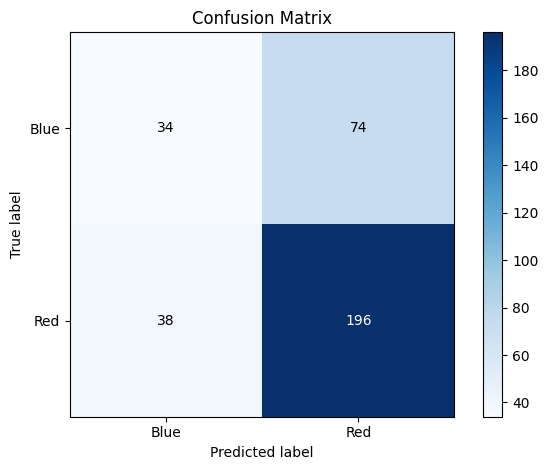

In [46]:
cm = confusion_matrix(y_test, y4_preds)
classes = unique_labels(y_test, y4_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        Blue       0.42      0.15      0.22       108
         Red       0.70      0.91      0.79       234

    accuracy                           0.67       342
   macro avg       0.56      0.53      0.50       342
weighted avg       0.61      0.67      0.61       342



In [48]:
print(classification_report(y_test, y2_preds))

              precision    recall  f1-score   support

        Blue       0.44      0.42      0.43       108
         Red       0.74      0.75      0.74       234

    accuracy                           0.65       342
   macro avg       0.59      0.58      0.59       342
weighted avg       0.64      0.65      0.64       342



In [49]:
print(classification_report(y_test, y3_preds))

              precision    recall  f1-score   support

        Blue       0.50      0.34      0.41       108
         Red       0.74      0.84      0.78       234

    accuracy                           0.68       342
   macro avg       0.62      0.59      0.60       342
weighted avg       0.66      0.68      0.67       342



In [50]:
print(classification_report(y_test, y4_preds))

              precision    recall  f1-score   support

        Blue       0.47      0.31      0.38       108
         Red       0.73      0.84      0.78       234

    accuracy                           0.67       342
   macro avg       0.60      0.58      0.58       342
weighted avg       0.65      0.67      0.65       342

